---
# 1. Introduction

- **Name:** Taufiqurrahman
- **Dataset:** [Emotion Detection from Text](https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text/data)

---

# 1.1 Problem Statement

Emotion detection from text presents a challenging problem in Natural Language Processing (NLP). The difficulty arises from the shortage of labeled datasets and the intricate, multi-class nature of the task. With the goal of leveraging NLP techniques, we aim to develop a robust model that effectively detects emotions in textual content. The limited availability of labeled data and the diverse spectrum of human emotions pose obstacles that need to be addressed. The objective is to explore and implement NLP methodologies to overcome these challenges and create a reliable model for accurate emotion detection in text.

---

# 1.2. Objective

This project aims to utilize advanced Natural Language Processing (NLP) techniques to create an efficient Emotion Detection model from text. The primary objectives include overcoming challenges associated with limited labeled data and the multi-class nature of emotions. By leveraging NLP methodologies, the goal is to develop a model that addresses class imbalance issues and accurately classifies diverse human emotions, contributing to advancements in sentiment analysis and human-computer interaction.

---


# 2. Import Libraries

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data processing libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and machine learning libraries
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from wordcloud import WordCloud

# TensorFlow and Keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Bidirectional, Reshape, TextVectorization,
    LSTM, Embedding, Dropout, BatchNormalization
)
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from nltk.tokenize import word_tokenize
import shutil
import os
from google.colab import files

# Download NLTK data for tokenization
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

---

# 3. Data Loading



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#create kaggle dictionary
!mkdir ~/.kaggle

In [ ]:
#copy kaggle.json to new directory
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle

In [ ]:
!kaggle datasets download -d pashupatigupta/emotion-detection-from-text

  0% 0.00/1.56M [00:00<?, ?B/s]
100% 1.56M/1.56M [00:00<00:00, 124MB/s]


In [ ]:
#unzip datasets
!unzip -q '/content/emotion-detection-from-text.zip' -d dataset

In [ ]:
data_path = '/content/dataset/tweet_emotions.csv'

In [ ]:
# Create dataset
df_ori = pd.read_csv(data_path)

# Duplicate data ori
df = df_ori.copy()


In [ ]:
# Show top 10 dataset
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [ ]:
# retrieve required columns
df=df[['sentiment','content']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  object
 1   content    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


The provided information describes a pandas DataFrame with 40,000 entries and two columns. The columns are named `sentiment` and `content`.

| Sentiment   | Explanation                                    |
|-------------|-------------------------------------------------|
| Neutral     | Lack of a specific emotional tone or inclination. |
| Worry       | Expressing concern or unease about something.     |
| Happiness   | Reflecting joy, contentment, or positive feelings.|
| Sadness     | Conveying a sense of sorrow or unhappiness.       |
| Love        | Expressing deep affection or strong positive emotions.|
| Surprise    | Indicating a sudden and unexpected reaction.       |
| Fun         | Reflecting enjoyment, amusement, or lightheartedness.|
| Relief      | Conveying a sense of ease or comfort after a stressful situation.|
| Hate        | Expressing strong dislike or aversion.             |
| Empty       | Conveying a feeling of emptiness or lack of emotion.|
| Enthusiasm  | Reflecting intense and eager interest or excitement.|
| Boredom     | Conveying a state of being bored or uninterested.   |
| Anger       | Expressing strong displeasure or hostility.         |


In [ ]:
df["sentiment"].value_counts()


neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

The dataset primarily consists of `neutral`, `worry`, and `happiness` `emotions`, suggesting a mix of sentiments. Notable counts for `sadness`, `love`, and `surprise` indicate varied emotional expressions. Lower representation of `anger` and `boredom` suggests fewer instances of negative emotions. The prevalence of `neutral` implies a significant portion lacks strong emotional content. This insight is valuable for sentiment analysis and emotion-aware applications, emphasizing the need for nuanced communication strategies.

---

# 4. Exploratory Data Analysis (EDA)

Distribution of sentiments in the data


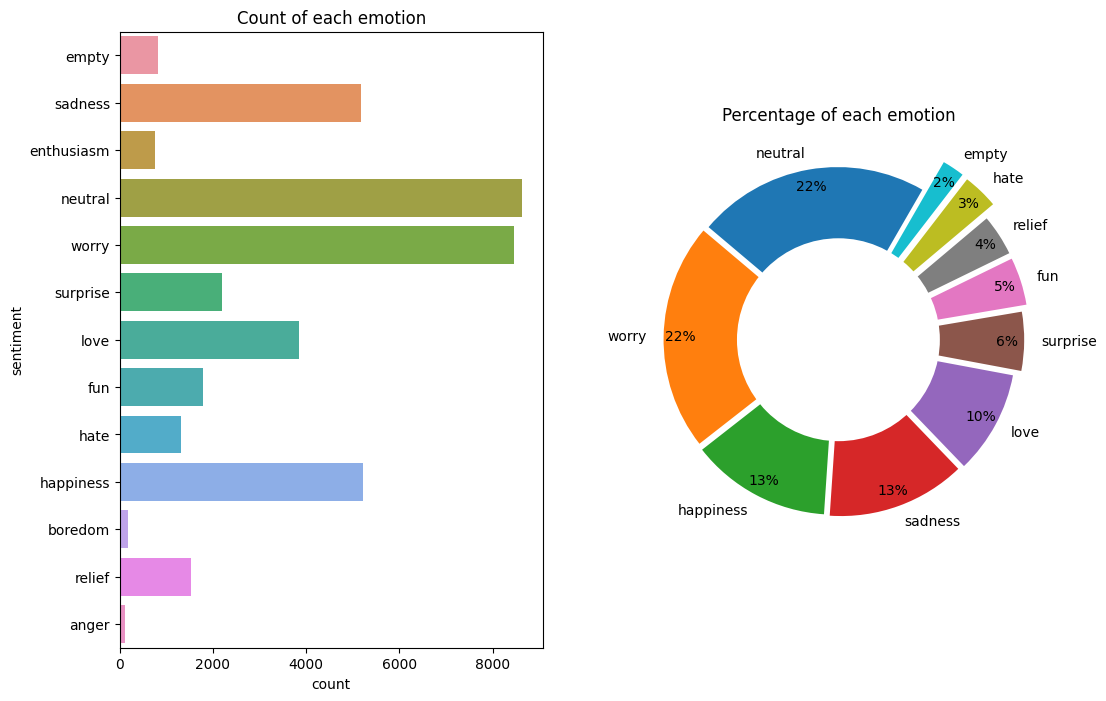

In [ ]:
col = 'sentiment'

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Calculate percentage values for pie chart
sizes = df[col].value_counts()[:10]
explode = (sizes / sizes.sum())[::-1]
labels = sizes.index[:10]

# Plot count of each emotion using countplot
sns.countplot(y=col, data=df, ax=ax1)
ax1.set_title("Count of each emotion")

# Plot percentage of each emotion using pie chart
ax2.pie(sizes, explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0, 0), 0.6, fc='white'))
ax2.set_title("Percentage of each emotion")

# Show the plot
plt.show()

Each class has 13 cases, but some of them don't have many. like being `angry`, `boredom`, `empty`, etc. The model won't be able to converge because the data set isn't smooth. There will be fewer classes.

In [ ]:
df['sentiment'] = df['sentiment'].apply(lambda x : x if x in ['happiness', 'sadness', 'worry', 'neutral', 'love'] else "other")

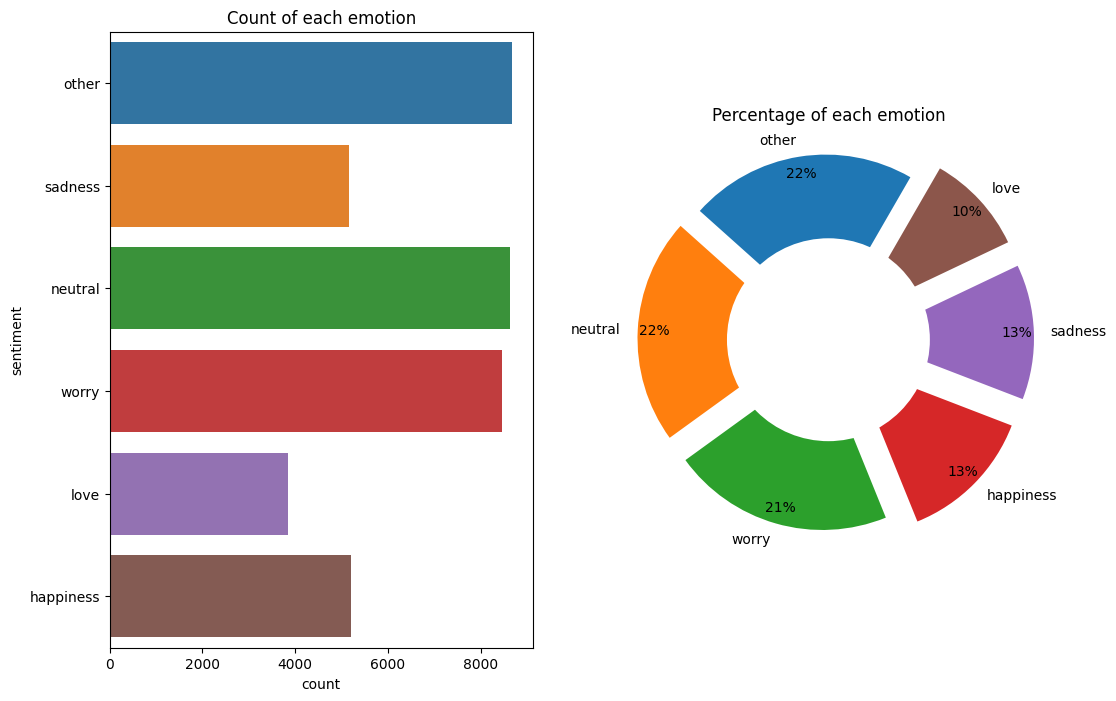

In [ ]:
col = 'sentiment'

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot count of each emotion using countplot
sns.countplot(y=col, data=df, ax=ax1)
ax1.set_title("Count of each emotion")

# Plot percentage of each emotion using pie chart
explode = list((df[col].value_counts() / len(df[col]))[:10])[::-1]
labels = df[col].value_counts().index[:10]
sizes = df[col].value_counts()[:10]

ax2.pie(sizes, explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0, 0), 0.6, fc='white'))
ax2.set_title("Percentage of each emotion")

# Show the plot
plt.show()

Reducing the data from 13 to 5 in the field of psychology can provide valuable insights into emotional cases.   The data can be condensed into five sets that are highly representative, resulting in faster and more focused emotional analysis.   This enables the identification of significant emotional patterns without being overwhelmed by the intricacies associated with a larger dataset.   Choosing a dataset that demonstrates significant fluctuations in emotions can provide valuable insights into the functioning of the human mind, while preserving the essence of the expressed emotions.



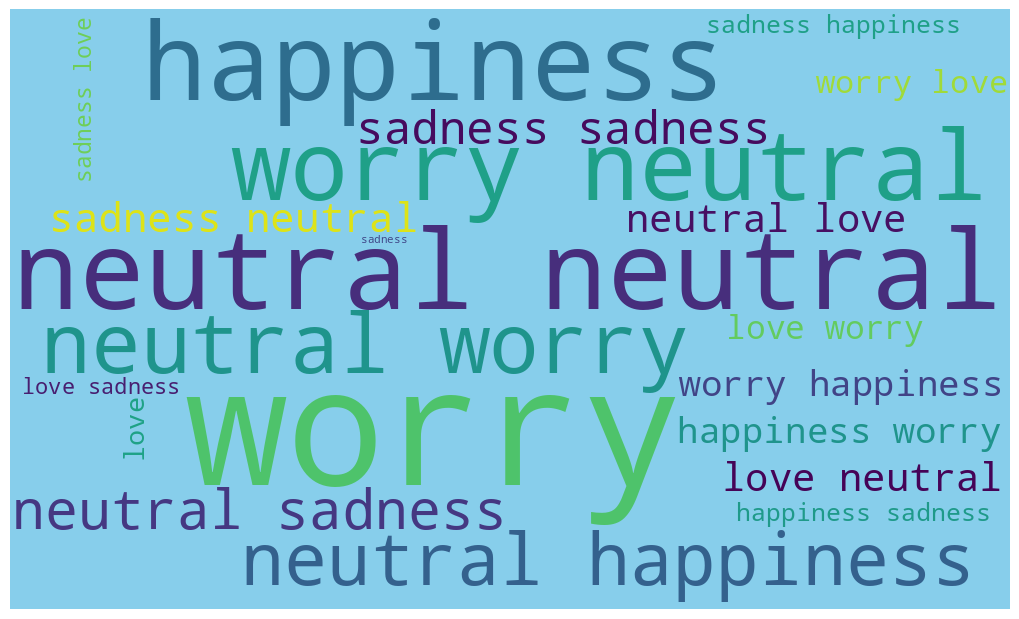

In [ ]:
# Concatenate all words in the 'sentiment' column
all_words = ' '.join(word for word in df['sentiment'])

# Create a WordCloud object
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='skyblue',
    min_font_size=10
).generate(all_words)

# Plot the WordCloud
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Analysis: Distribution of Sentiments

- The word cloud provides a visual representation of the sentiment distribution in the 'sentiment' column of the DataFrame.

- The words that stand out more prominently in the cloud are the ones that occur more frequently in the dataset.


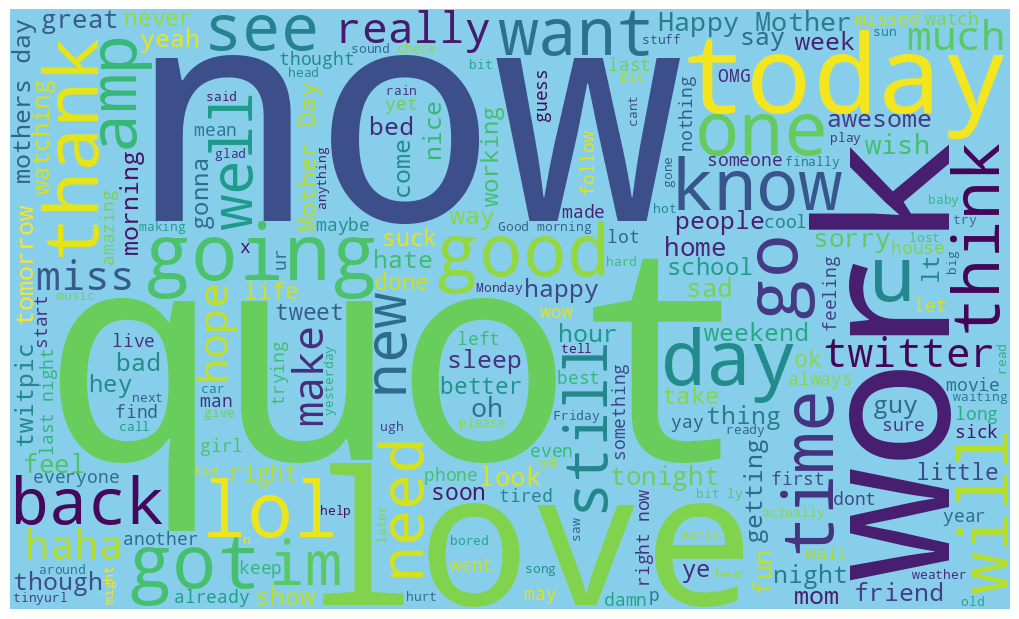

In [ ]:
# Concatenate all words in the 'sentiment' column
all_words = ' '.join(word for word in df['content'])

# Create a WordCloud object
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='skyblue',
    min_font_size=10
).generate(all_words)

# Plot the WordCloud
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here are a few reflections:

- Word Frequency: The words that appear most frequently in the "content" column are the ones that are larger and more significant in the cloud.   Here is a list of the most commonly used words or terms in the dataset.

- Identifying key themes: Pay attention to clusters of words that may indicate significant concepts or recurring ideas in the text.

- Visualization: The word cloud presents the written data in a visual format, highlighting the significance of various words.




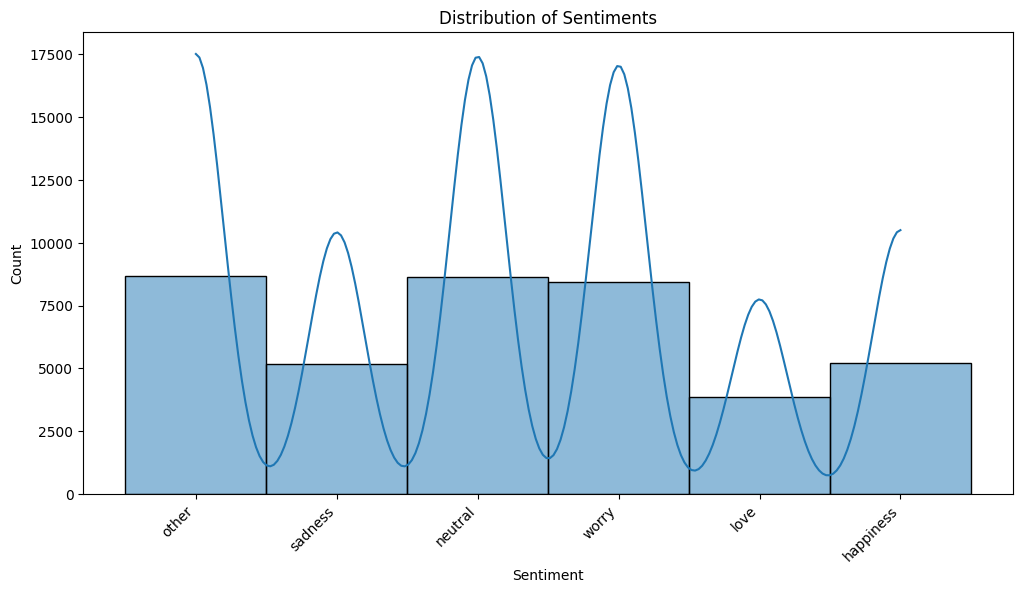

In [ ]:
# Create a colorful histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(x='sentiment', data=df, kde=True, palette='viridis', element='bars')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Based on the data provided, it is evident that the distribution of data is fairly balanced, with the `other`, `neutral`, and `worried` columns being the most dominant.


---
# 5. Feature Engineering



# Take Sample Inference Data

In [ ]:
data_inf = df.sample(1, random_state=0)
data_inf # check data is not missing value

,sentiment,content
12836,sadness,@aaronhoskins I fucking miss that band so so much


In [ ]:
# delete inference data from X and y
df.drop(data_inf.index, inplace=True)

# reset index for data_inf and
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Export Inference data
data_inf.to_csv('Data_inf.csv')

---
### A. Handling Missing Values

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Returns the number of missing values in each column
missing_values

sentiment    0
content      0
dtype: int64

There are no missing values for any of the features in the dataset.


---
## B. Text Preprocessing

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [ ]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)
  text = re.sub("<", " ", text)


  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stop_words]

  # Stemming
  tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

In [ ]:
# Applying Text Preprocessing to the dfset
df['text_processed'] = df['content'].apply(lambda x: text_preprocessing(x))
df

,sentiment,content,text_processed
0,other,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier start freakin ...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhh waitin call
2,sadness,Funeral ceremony...gloomy friday...,funer ceremoni gloomi friday
3,other,wants to hang out with friends SOON!,want hang friend soon
4,neutral,@dannycastillo We want to trade with someone w...,want trade someon houston ticket one
...,...,...,...
39994,neutral,@JohnLloydTaylor,
39995,love,Happy Mothers Day All my love,happi mother day love
39996,love,Happy Mother's Day to all the mommies out ther...,happi mother 's day mommi woman man long re mo...
39997,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,wassup beauti follow peep new hit singl def wa...


---
## C. Target Conversion

In [ ]:
# Display Target
df.sentiment.unique()

array(['other', 'sadness', 'neutral', 'worry', 'love', 'happiness'],
      dtype=object)

In [ ]:
# Change Target into Number
df['label'] = df['sentiment'].replace({
    'other': 0,
    'sadness': 1,
    'neutral': 2,
    'worry': 3,
    'love': 4,
    'happiness': 5,
})
df


,sentiment,content,text_processed,label
0,other,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier start freakin ...,0
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhh waitin call,1
2,sadness,Funeral ceremony...gloomy friday...,funer ceremoni gloomi friday,1
3,other,wants to hang out with friends SOON!,want hang friend soon,0
4,neutral,@dannycastillo We want to trade with someone w...,want trade someon houston ticket one,2
...,...,...,...,...
39994,neutral,@JohnLloydTaylor,,2
39995,love,Happy Mothers Day All my love,happi mother day love,4
39996,love,Happy Mother's Day to all the mommies out ther...,happi mother 's day mommi woman man long re mo...,4
39997,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,wassup beauti follow peep new hit singl def wa...,5


The dataset categorizes text entries based on emotions, including sadness, love, happiness, and neutral sentiments.   The "text_processed" column represents the preprocessed version of the original text, typically after performing tasks like eliminating mentions, hashtags, and stemming.   It is worth mentioning that the "label" column contains numerical labels that correspond to different emotions.


In [ ]:
# Target Distribution
df['label'].value_counts()

0    8687
2    8638
3    8459
5    5209
1    5164
4    3842
Name: label, dtype: int64

In [ ]:
print(df['label'].dtype)


int64


In [ ]:
# df Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df.text_processed,
                                                    df.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (30599,)
Val Size   :  (3400,)
Test Size  :  (6000,)


In [ ]:
y_val.value_counts()

0    738
2    734
3    719
5    443
1    439
4    327
Name: label, dtype: int64

---
## D. Feature Encoding

In [ ]:
# Change Target to One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

---
# 6. Model Definition

## A. Text Vectorization

In [ ]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<30599x19243 sparse matrix of type '<class 'numpy.int64'>'
	with 207711 stored elements in Compressed Sparse Row format>

In [ ]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  19243
Maximum Sentence Length :  31 tokens


In [ ]:
# Text Vectorization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [ ]:
# Example Result
## Document example
print('Document example')
print(df.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df.text_processed[0]]))
print('Vector size : ', text_vectorization([df.text_processed[0]]).shape)

Document example
know listenin bad habit earlier start freakin part

Result of Text Vectorization
tf.Tensor(
[[  22 2917   67 3316  704   88 1005  368    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]], shape=(1, 31), dtype=int64)
Vector size :  (1, 31)


In [ ]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 's',
 'nt',
 'day',
 'go',
 'm',
 'get',
 'good',
 'work',
 'love',
 'like',
 'quot',
 'got',
 'today',
 'time',
 'happi',
 'thank',
 'one',
 'lol']

---
## B. Word Embedding

In [ ]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=100,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [ ]:
# Example Result
## Document example
print('Document example')
print(df.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df.text_processed[0]]))
print('Vector size : ', text_vectorization([df.text_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df.text_processed[0]])))
print('Vector size : ', embedding(text_vectorization([df.text_processed[0]])).shape)

Document example
know listenin bad habit earlier start freakin part

Result of  Text Vectorization
tf.Tensor(
[[  22 2917   67 3316  704   88 1005  368    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]], shape=(1, 31), dtype=int64)
Vector size :  (1, 31)

Result of  Embedding
tf.Tensor(
[[[-0.03718623 -0.0181622   0.03727819 ... -0.03109632  0.02889944
    0.04194852]
  [ 0.04749003 -0.02542806  0.01420568 ... -0.04000064 -0.03896488
    0.03744234]
  [-0.00779497 -0.009123   -0.00660466 ... -0.00835823 -0.02166303
   -0.0305814 ]
  ...
  [-0.03760775 -0.01613791  0.0029624  ... -0.0107998   0.0337693
   -0.02510618]
  [-0.03760775 -0.01613791  0.0029624  ... -0.0107998   0.0337693
   -0.02510618]
  [-0.03760775 -0.01613791  0.0029624  ... -0.0107998   0.0337693
   -0.02510618]]], shape=(1, 31, 100), dtype=float32)
Vector size :  (1, 31, 100)


---
## C. LSTM

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Model Training using LSTM
%%time

## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(6, activation='softmax'))

# Compile the model with a lower learning rate
model_lstm_1.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics='accuracy')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_ohe, epochs=60,
                                     validation_data=(X_val, y_val_ohe), callbacks=[early_stopping])

Epoch 1/60
957/957 [==============================] - 46s 35ms/step - loss: 1.6103 - accuracy: 0.3171 - val_loss: 1.5633 - val_accuracy: 0.3388
Epoch 2/60
957/957 [==============================] - 17s 18ms/step - loss: 1.4313 - accuracy: 0.4210 - val_loss: 1.6253 - val_accuracy: 0.3318
Epoch 3/60
957/957 [==============================] - 16s 17ms/step - loss: 1.2439 - accuracy: 0.5229 - val_loss: 1.7260 - val_accuracy: 0.3271
Epoch 4/60
957/957 [==============================] - 14s 15ms/step - loss: 1.0483 - accuracy: 0.6115 - val_loss: 1.8564 - val_accuracy: 0.3209
Epoch 5/60
957/957 [==============================] - 15s 15ms/step - loss: 0.8826 - accuracy: 0.6755 - val_loss: 2.0567 - val_accuracy: 0.3071
Epoch 6/60
957/957 [==============================] - 16s 17ms/step - loss: 0.7622 - accuracy: 0.7200 - val_loss: 2.2220 - val_accuracy: 0.2962
CPU times: user 2min 1s, sys: 6.81 s, total: 2min 8s
Wall time: 2min 6s


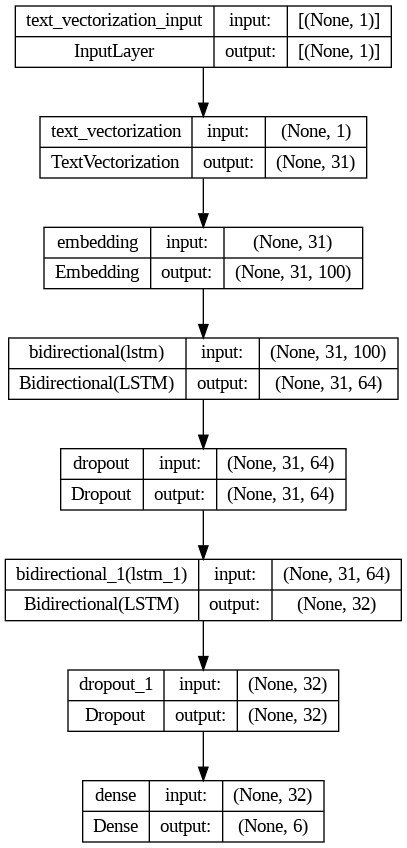

In [ ]:
tf.keras.utils.plot_model(model_lstm_1, show_shapes=True)

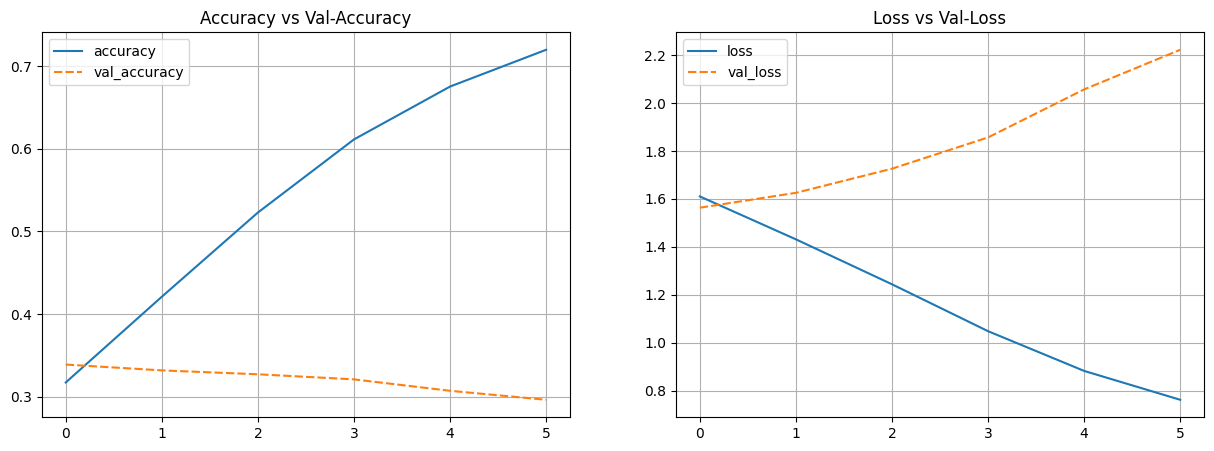

In [ ]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

There are signs of underfitting that can be seen in the LSTM training. The fact that both the training and validation data have high loss values that don't go down significantly over time says that the model is having a hard time understanding the complex patterns in the training set.


---
# 7. Model Training

## A. LSTM with Transfer Learning

In [ ]:
# Download the Embedding Layer
url = 'https://tfhub.dev/google/tf2-preview/nnlm-id-dim128-with-normalization/1'

# Load the embedding layer from TensorFlow Hub
hub_layer = hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

# Create a simple model using the embedding layer
model = Sequential([
    hub_layer,
    Reshape((128,)),  # Example Reshape layer, adjust the shape according to your needs
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))
model_lstm_2.add(Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Dropout(0.2))
model_lstm_2.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Dropout(0.2))
model_lstm_2.add(Dense(6, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Compile the model with a lower learning rate
model_lstm_2.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics='accuracy')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=60,
                                     validation_data=(X_val, y_val_ohe), callbacks=[early_stopping])


Epoch 1/60
957/957 [==============================] - 38s 30ms/step - loss: 1.8691 - accuracy: 0.2233 - val_loss: 1.8260 - val_accuracy: 0.2338
Epoch 2/60
957/957 [==============================] - 25s 26ms/step - loss: 1.7441 - accuracy: 0.2445 - val_loss: 1.7762 - val_accuracy: 0.2435
Epoch 3/60
957/957 [==============================] - 26s 28ms/step - loss: 1.7196 - accuracy: 0.2552 - val_loss: 1.7414 - val_accuracy: 0.2382
Epoch 4/60
957/957 [==============================] - 26s 28ms/step - loss: 1.7113 - accuracy: 0.2596 - val_loss: 1.7212 - val_accuracy: 0.2618
Epoch 5/60
957/957 [==============================] - 26s 27ms/step - loss: 1.7048 - accuracy: 0.2623 - val_loss: 1.6997 - val_accuracy: 0.2597
Epoch 6/60
957/957 [==============================] - 27s 28ms/step - loss: 1.7034 - accuracy: 0.2632 - val_loss: 1.7268 - val_accuracy: 0.2468
Epoch 7/60
957/957 [==============================] - 25s 26ms/step - loss: 1.7013 - accuracy: 0.2676 - val_loss: 1.7095 - val_accuracy:

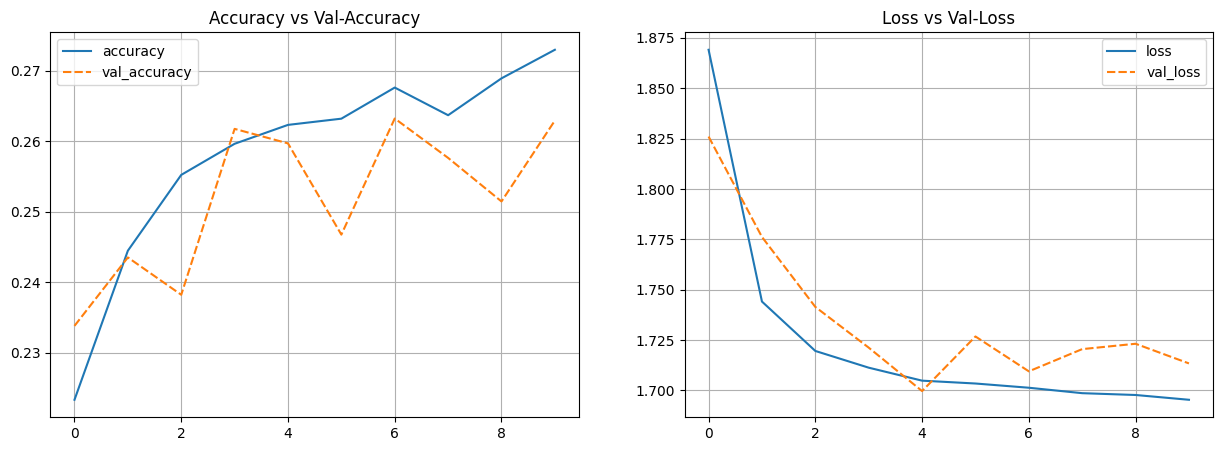

In [ ]:
# Plot Training Results
model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Insight?

In [ ]:
model_lstm_2_hist_df

,loss,accuracy,val_loss,val_accuracy
0,1.869113,0.223341,1.826018,0.233824
1,1.744102,0.244485,1.776175,0.243529
2,1.719579,0.255237,1.741439,0.238235
3,1.711276,0.259649,1.721225,0.261765
4,1.704832,0.262329,1.699668,0.259706
5,1.703416,0.263211,1.726763,0.246765
6,1.701317,0.267623,1.709456,0.263235
7,1.698617,0.263701,1.720493,0.257647
8,1.697715,0.268930,1.723150,0.251471
9,1.695340,0.272983,1.713388,0.262941


The training log indicates positive trends, with decreasing training loss and increasing accuracy. However, potential overfitting needs attention, as reflected in the close monitoring of validation metrics. Stability in these metrics is crucial for model reliability, and fluctuations may indicate instability. Addressing issues like a gap between training and validation accuracy may require adjustments to the model or regularization techniques. Implementing early stopping if the validation loss plateaus can enhance generalization. Additionally, assessing data distribution for imbalances or outliers is essential for a more comprehensive analysis of model performance.

In [ ]:
# prediction test data
y_pred = model_lstm_1.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

188/188 [==============================] - 3s 6ms/step


In [ ]:
y_pred

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
test_1 = np.argmax(y_pred)
test_1

112

In [ ]:
test_2 = np.where(y_pred >= 0.45, 1, 0)
test_2

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
# report classification
print(classification_report(y_test_ohe, y_pred))#, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1303
           1       0.50      0.01      0.02       775
           2       0.00      0.00      0.00      1296
           3       0.00      0.00      0.00      1269
           4       0.58      0.26      0.36       576
           5       0.00      0.00      0.00       781

   micro avg       0.57      0.03      0.05      6000
   macro avg       0.18      0.05      0.06      6000
weighted avg       0.12      0.03      0.04      6000
 samples avg       0.03      0.03      0.03      6000



The classification report gives a thorough look at how well the model did in different categories. Notably, class 4 stands out because it has a higher precision, recall, and F1-score, which means that people are better at correctly naming examples of this class. However, the general performance of the model doesn't seem to be very good, as shown by the consistently low metrics for most classes. The micro average F1-score, which looks at the overall performance, is only 0.05, which means it's not very successful. The weighted average F1 score and precision stay low, which shows how hard it is to get performance to be equal across all groups. This study shows that the model needs to be improved even more so that it can work better across a wider range of classes and make better predictions generally.


---
# 8. Model Saving



In [ ]:
# Freeze Model
model_lstm_1.trainable = True

In [ ]:
model_lstm_1.save('best_model')

In [ ]:
#Nama direktori tempat menyimpan model
model_dir = 'best_model'

#Simpan model sebagai SavedModel TensorFlow
model_lstm_1.save(model_dir, save_format='tf')

#Kompres direktori model menjadi file ZIP
shutil.make_archive(model_dir, 'zip', model_dir)

#Mengunduh file ZIP model
files.download(f'{model_dir}.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Model Summary
model_lstm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               112461824 
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 bidirectional (Bidirection  (None, 128, 128)          33792     
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 128, 128)          512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128, 128)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                4

---
# 9. Model Inference
The inference model is in a different file with the name **P2G7_Taufiqurrahman_inf.ipyn**

---
# 10. Conclusion

- When developing this emotion detection model for text, I began by thoroughly defining the challenge of comprehending emotions from text through the use of Natural Language Processing (NLP).   I focused on addressing the difficulties associated with a scarcity of labeled data and the intricate aspects of multiple emotions.

- I began by importing a range of libraries and modules, such as TensorFlow, scikit-learn, and NLTK, to establish the foundation for my project.   The process of loading the data required navigating Google Drive, downloading a dataset from Kaggle, and utilizing Pandas to thoroughly explore and gain a deeper understanding of the data.

- During the Exploratory Data Analysis (EDA) phase, I utilized countplots and pie charts to visualize sentiment distributions in the dataset.   I utilized feature engineering techniques to optimize the emotional analysis process. Additionally, I generated visualizations such as word clouds and histograms to extract valuable insights from the data.

- Text preprocessing played a crucial role in my work as I handled missing values, carried out tasks like case folding, removing mentions and hashtags, and applied techniques like tokenization, stopword removal, and stemming.   Converting the target variable into numerical labels, splitting the data into training, validation, and test sets, and employing one-hot encoding for the target variable were all crucial steps in the process.

- The model was constructed using LSTM layers, text vectorization, and embedding techniques.   During the training process, I spent time examining the results visually and carefully studying the logs. Additionally, I utilized transfer learning by incorporating a pre-trained embedding layer from TensorFlow Hub. This approach allowed me to tap into the knowledge and insights already present in the existing knowledge base.

- The model demonstrated potential in capturing complex patterns, particularly when utilizing transfer learning. However, it encountered difficulties due to the scarcity of labeled data and the subtle nature of emotions.   As a data science bootcamp student, this project emphasized the significance of consistently improving and adjusting models to ensure their effectiveness in various textual situations.   The process is similar to becoming proficient in a new skill – every advancement brings fresh perspectives and obstacles, fostering continuous development and enhancement.
---

